In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


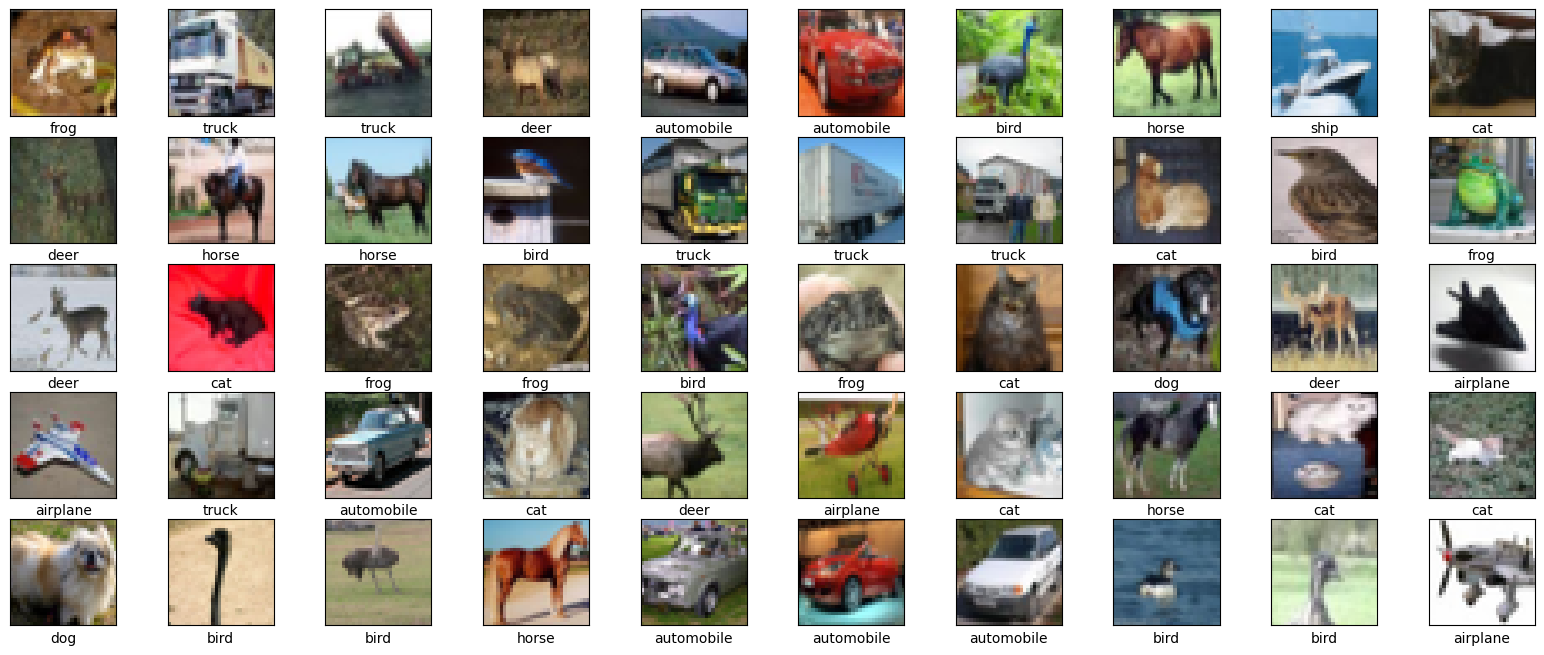

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0


In [6]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', kernel_regularizer=regularizers.l2(0.001)), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    # layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    # layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.25),

    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [7]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9),
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    metrics= ['accuracy']
)


In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [10]:
h = model.fit(x=X_train, y=Y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
1250/1250 [==============================] - 72s 57ms/step - loss: 1.4973 - accuracy: 0.5096 - val_loss: 1.4089 - val_accuracy: 0.5551
Epoch 2/50
1250/1250 [==============================] - 72s 57ms/step - loss: 1.4489 - accuracy: 0.5307 - val_loss: 1.3420 - val_accuracy: 0.5875
Epoch 3/50
1250/1250 [==============================] - 72s 58ms/step - loss: 1.4146 - accuracy: 0.5473 - val_loss: 1.2923 - val_accuracy: 0.6115
Epoch 4/50
1250/1250 [==============================] - 70s 56ms/step - loss: 1.3909 - accuracy: 0.5601 - val_loss: 1.2695 - val_accuracy: 0.6238
Epoch 5/50
1250/1250 [==============================] - 72s 57ms/step - loss: 1.3636 - accuracy: 0.5736 - val_loss: 1.2892 - val_accuracy: 0.6047
Epoch 6/50
1250/1250 [==============================] - 71s 56ms/step - loss: 1.3462 - accuracy: 0.5867 - val_loss: 1.2425 - val_accuracy: 0.6291
Epoch 7/50
1250/1250 [==============================] - 71s 57ms/step - loss: 1.3298 - accuracy: 0.5903 - val_loss: 1.2119 -

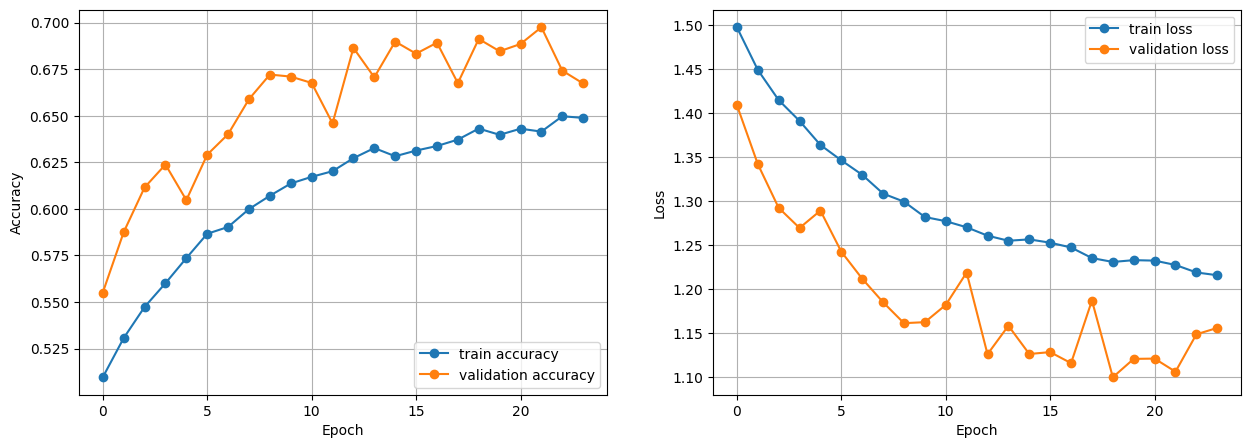

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [12]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)


313/313 [==============================] - 4s 14ms/step - loss: 1.1156 - accuracy: 0.6894

Test Accuracy: 0.6894000172615051

Test Loss: 1.1155812740325928


In [13]:
predictions = model.predict(X_test)

313/313 [==============================] - 5s 17ms/step


In [14]:
predictions[0]

array([0.00594773, 0.00134655, 0.01488769, 0.55739367, 0.02946864,
       0.3177844 , 0.03954002, 0.00937598, 0.01898108, 0.00527431],
      dtype=float32)

In [15]:
np.argmax(predictions[0])

3

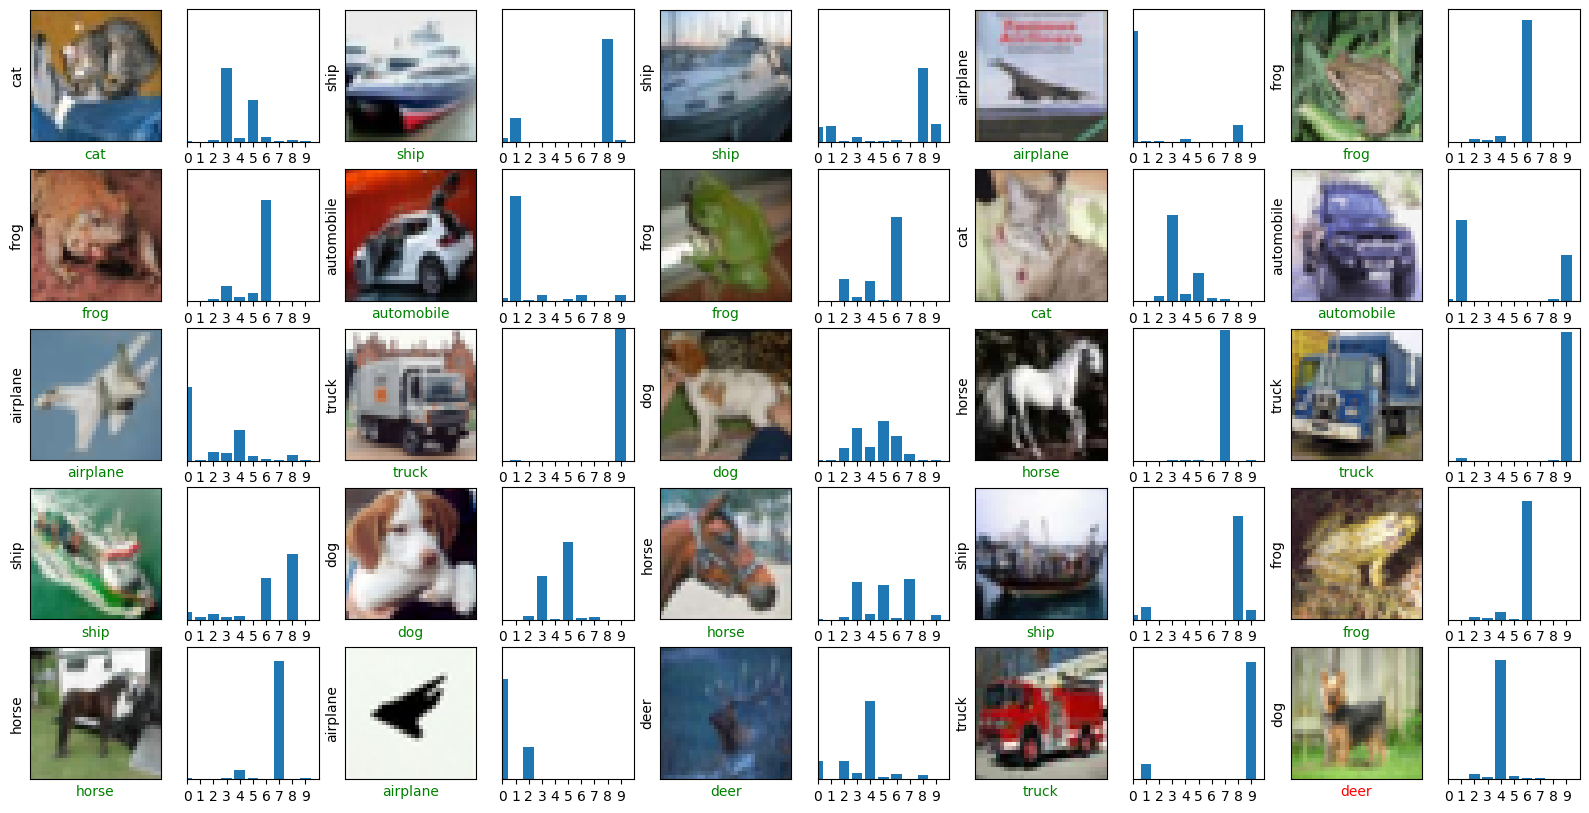

In [16]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()

In [17]:
model.compile(
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    metrics= ['accuracy']
)

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [19]:
h1 = model.fit(x=X_train, y=Y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
1250/1250 [==============================] - 78s 62ms/step - loss: 1.1611 - accuracy: 0.6640 - val_loss: 1.0886 - val_accuracy: 0.6931
Epoch 2/50
1250/1250 [==============================] - 77s 62ms/step - loss: 1.1302 - accuracy: 0.6745 - val_loss: 1.0210 - val_accuracy: 0.7185
Epoch 3/50
1250/1250 [==============================] - 72s 57ms/step - loss: 1.1204 - accuracy: 0.6765 - val_loss: 1.0749 - val_accuracy: 0.6946
Epoch 4/50
1250/1250 [==============================] - 72s 58ms/step - loss: 1.1087 - accuracy: 0.6773 - val_loss: 1.0322 - val_accuracy: 0.7062
Epoch 5/50
1250/1250 [==============================] - 70s 56ms/step - loss: 1.0858 - accuracy: 0.6852 - val_loss: 1.0112 - val_accuracy: 0.7150
Epoch 6/50
1250/1250 [==============================] - 72s 57ms/step - loss: 1.0834 - accuracy: 0.6843 - val_loss: 1.0353 - val_accuracy: 0.7048
Epoch 7/50
1250/1250 [==============================] - 71s 57ms/step - loss: 1.0743 - accuracy: 0.6873 - val_loss: 0.9868 -

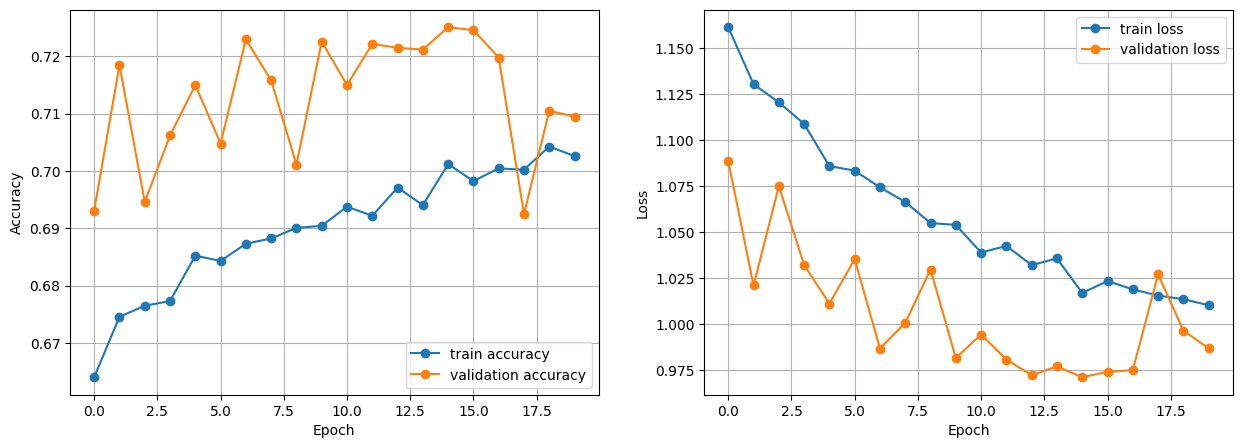

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [21]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 6s 18ms/step - loss: 0.9820 - accuracy: 0.7184

Test Accuracy: 0.7184000015258789

Test Loss: 0.982047438621521


In [22]:
predictions = model.predict(X_test)

313/313 [==============================] - 5s 16ms/step


In [23]:
predictions[0]

array([0.00477321, 0.00048791, 0.01148474, 0.4875236 , 0.00631927,
       0.4560913 , 0.01042435, 0.00236377, 0.01883242, 0.0016994 ],
      dtype=float32)

In [24]:
np.argmax(predictions[0])

3

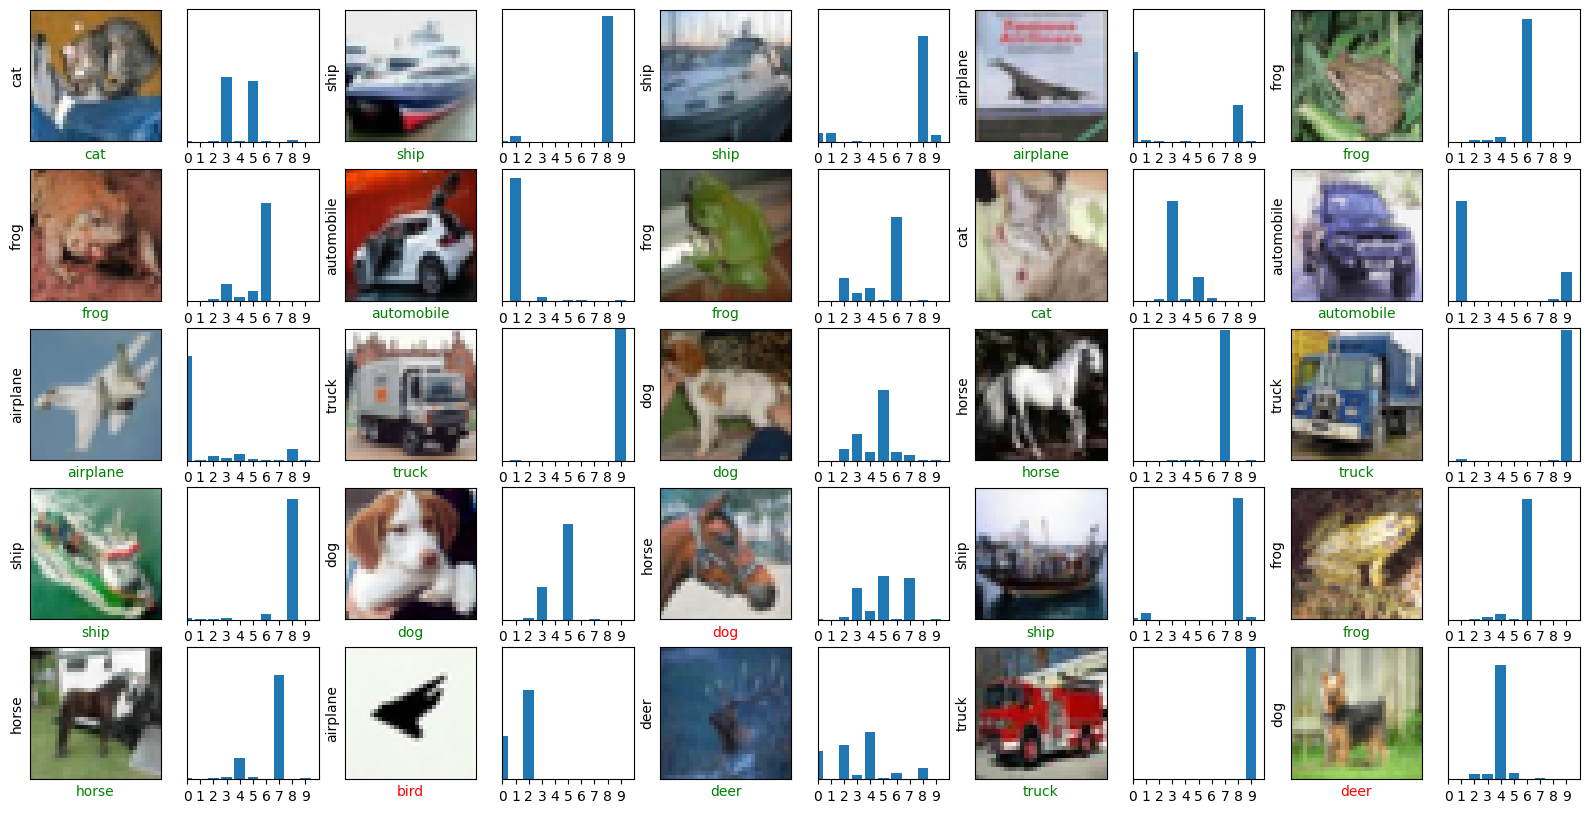

In [25]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()

In [26]:
model.compile(
    optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.9),
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    metrics= ['accuracy']
)

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [28]:
h2 = model.fit(x=X_train, y=Y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
1250/1250 [==============================] - 73s 58ms/step - loss: 2.0817 - accuracy: 0.2988 - val_loss: 1.8531 - val_accuracy: 0.3644
Epoch 2/50
1250/1250 [==============================] - 77s 61ms/step - loss: 1.9535 - accuracy: 0.3282 - val_loss: 1.8326 - val_accuracy: 0.3637
Epoch 3/50
1250/1250 [==============================] - 71s 56ms/step - loss: 1.9064 - accuracy: 0.3417 - val_loss: 1.8688 - val_accuracy: 0.3446
Epoch 4/50
1250/1250 [==============================] - 72s 58ms/step - loss: 1.9077 - accuracy: 0.3405 - val_loss: 1.8465 - val_accuracy: 0.3584
Epoch 5/50
1250/1250 [==============================] - 72s 57ms/step - loss: 1.8948 - accuracy: 0.3458 - val_loss: 1.8378 - val_accuracy: 0.3600
Epoch 6/50
1250/1250 [==============================] - 72s 58ms/step - loss: 1.9290 - accuracy: 0.3219 - val_loss: 1.9020 - val_accuracy: 0.3330
Epoch 7/50
1250/1250 [==============================] - 71s 57ms/step - loss: 1.9256 - accuracy: 0.3203 - val_loss: 1.9623 -

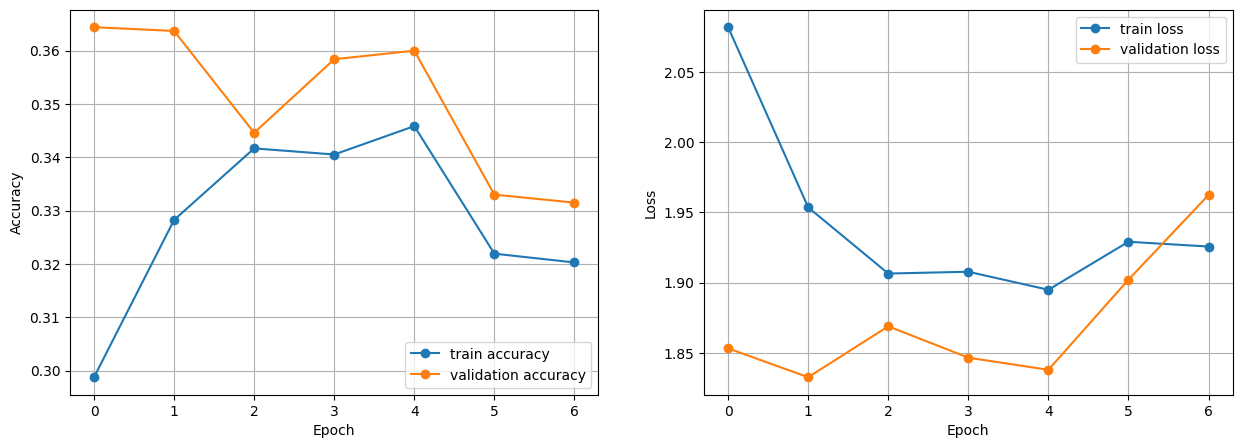

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [30]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 6s 18ms/step - loss: 1.8261 - accuracy: 0.3750

Test Accuracy: 0.375

Test Loss: 1.8260966539382935


In [31]:
predictions = model.predict(X_test)

313/313 [==============================] - 4s 14ms/step


In [32]:
predictions[0]

array([0.02980287, 0.02529252, 0.12159036, 0.2337113 , 0.06669062,
       0.2976412 , 0.07561913, 0.10006375, 0.01891666, 0.03067159],
      dtype=float32)

In [33]:
np.argmax(predictions[0])

5

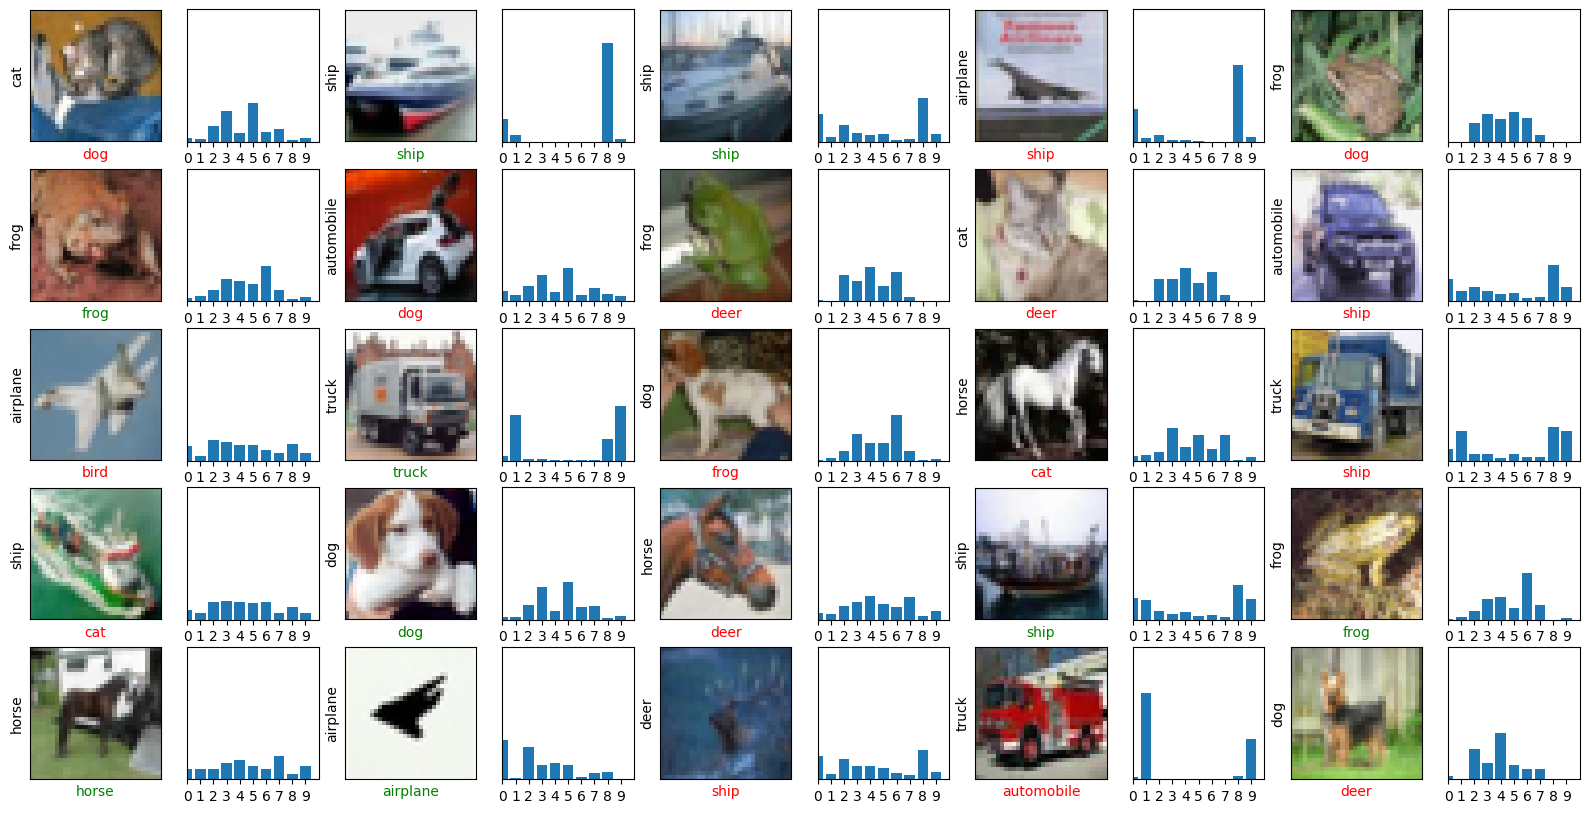

In [34]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()

I have used dropout in this model. Dropout is a regularization technique used in deep learning to prevent overfitting of the model to the training data. It involves randomly dropping out some of the neurons in the network during training. L2 regularizer is been used, L2 regularization adds a penalty term that is proportional to the square of the weights.

According to the graph comparing Adam, SGD, and RMSprop, there is some indication of underfitting initially, but this issue gradually decreases over time. Test accuracy for adam, sgd, and rmsprop are 0.6894000172615051, 0.7184000015258789, 0.375. And test losses are 1.1155812740325928, 0.982047438621521, 1.8260966539382935. So in this model, Sgd optimizer is working pretty well but RMSprop is working poorly